## FULL WORKING CODE — Heatmap Animation

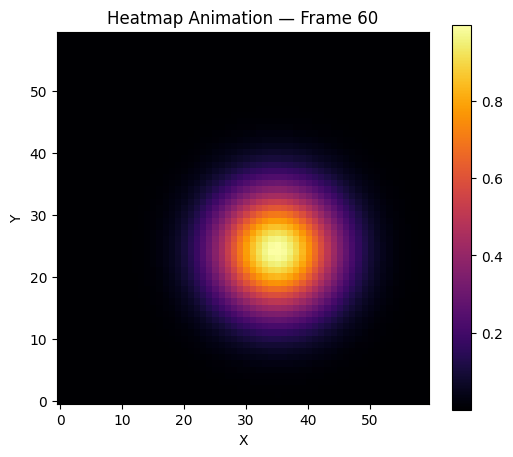

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ---------------------------------------
# Create output directory
# ---------------------------------------
os.makedirs("gifs", exist_ok=True)

# ---------------------------------------
# Grid setup
# ---------------------------------------
nx, ny = 60, 60
x = np.linspace(-3, 3, nx)
y = np.linspace(-3, 3, ny)
X, Y = np.meshgrid(x, y)

# Initial heatmap
Z = np.exp(-(X**2 + Y**2))

# ---------------------------------------
# Generate evolving heatmaps
# ---------------------------------------
steps = 60
heatmaps = []

for t in range(steps):
    shift = np.sin(t * 0.15)
    Z_t = np.exp(-((X - shift)**2 + (Y + shift)**2))
    heatmaps.append(Z_t)

# ---------------------------------------
# Plot setup
# ---------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(
    heatmaps[0],
    cmap="inferno",
    origin="lower",
    animated=True
)

ax.set_title("Heatmap Animation")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.colorbar(im, ax=ax)

# ---------------------------------------
# Animation
# ---------------------------------------
writer = PillowWriter(fps=6)

with writer.saving(fig, "gifs/heatmap_animation.gif", dpi=120):
    for i in range(len(heatmaps)):
        im.set_array(heatmaps[i])
        ax.set_title(f"Heatmap Animation — Frame {i+1}")
        writer.grab_frame()

plt.show()
